In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, accuracy_score
from sklearn import linear_model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# Esta notebook es un primer boceto de lo que habría que hacer.
  Ojo con el nombre de las series que se me pudo haber escapado algo de los ejemplos.
  
  Tener en cuenta la creación de nuestras X e y. 
  
  En el modelo Naive Bayes Multinomial la mayoría de los ejemplos es con clasificador de texto.
  
  Ojo  con la estandarización de aplicarlo al set de entreamiento y llevar esa transformación al de testeo.

## Cargar el data set

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('df_ecobicis_final.csv')


In [3]:
#Se toma un sample para visualizar lo que tenemos hasta ahora.
df.sample(10)

,Unnamed: 0,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,...,barrio_origen,comuna_origen,barrio_destino,comuna_destino,feriado,dia,uso_categorico,hora_simple,estacion_agno,rango_horario
2749911,2749911,110127,2019-01-08 18:14:07,11,Velasco,129,Guayaquil,87,M,31,...,VILLA CRESPO,15,CABALLITO,6,0,MARTES,BAJO,18,VERANO,18-23
903859,903859,469052,2018-06-16 18:25:23,17,Once II,163,Plaza Güemes,25,M,19,...,BALVANERA,3,PALERMO,14,0,SABADO,BAJO,18,OTOÑO,18-23
2004842,2004842,579931,2018-10-09 19:27:31,58,San Luis y Ecuador,170,Ayacucho,76,M,38,...,BALVANERA,3,BALVANERA,3,0,MARTES,ALTO,19,PRIMAVERA,18-23
1645261,1645261,17481,2018-09-07 13:45:57,22,Quintana,115,Ugarteche,124,F,31,...,RECOLETA,2,PALERMO,14,0,VIERNES,MEDIO,13,INVIERNO,12-17
185529,185529,238944,2018-02-15 17:33:23,37,Hospital Francés,146,Hospital Ramos Mejía,120,M,31,...,SAN CRISTOBAL,3,BALVANERA,3,0,JUEVES,MEDIO,17,VERANO,12-17
577687,577687,319743,2018-05-07 20:05:25,13,Parque Centenario,29,Doblas,80,M,25,...,CABALLITO,6,CABALLITO,6,0,LUNES,BAJO,20,OTOÑO,18-23
1689400,1689400,466493,2018-09-11 17:22:49,29,Plaza Boedo,28,Acuña de Figueroa,54,M,21,...,BOEDO,5,ALMAGRO,5,0,MARTES,MEDIO,17,INVIERNO,12-17
2554452,2554452,514184,2018-12-23 17:57:52,16,Plaza Güemes,25,Plaza Güemes,25,M,23,...,PALERMO,14,PALERMO,14,0,DOMINGO,BAJO,17,VERANO,12-17
472630,472630,163950,2018-04-23 08:16:07,18,Don Bosco,134,Juncal,190,F,22,...,ALMAGRO,5,PALERMO,14,0,LUNES,BAJO,8,OTOÑO,6-11
2425358,2425358,28620,2018-11-28 15:20:12,22,Guardia Vieja,110,F. J. Santamaría de Oro,125,M,53,...,ALMAGRO,5,PALERMO,14,0,MIERCOLES,MEDIO,15,PRIMAVERA,12-17


## Revisar las columnas que tenemos para determinar las variables a usar, la creación de las varibales dummies y la eliminación de variables redundantes

In [4]:
#Qué columnas tenemos
df.columns

Index(['Unnamed: 0', 'bici_id_usuario', 'bici_Fecha_hora_retiro',
       'bici_tiempo_uso', 'bici_nombre_estacion_origen',
       'bici_estacion_origen', 'bici_nombre_estacion_destino',
       'bici_estacion_destino', 'bici_sexo', 'bici_edad', 'fecha', 'hora',
       'dia_semana', 'barrio_origen', 'comuna_origen', 'barrio_destino',
       'comuna_destino', 'feriado', 'dia', 'uso_categorico', 'hora_simple',
       'estacion_agno', 'rango_horario'],
      dtype='object')

In [5]:
#Revisando valores nulos
df.isnull().sum()

Unnamed: 0                      0
bici_id_usuario                 0
bici_Fecha_hora_retiro          0
bici_tiempo_uso                 0
bici_nombre_estacion_origen     0
bici_estacion_origen            0
bici_nombre_estacion_destino    0
bici_estacion_destino           0
bici_sexo                       0
bici_edad                       0
fecha                           0
hora                            0
dia_semana                      0
barrio_origen                   0
comuna_origen                   0
barrio_destino                  0
comuna_destino                  0
feriado                         0
dia                             0
uso_categorico                  0
hora_simple                     0
estacion_agno                   0
rango_horario                   0
dtype: int64

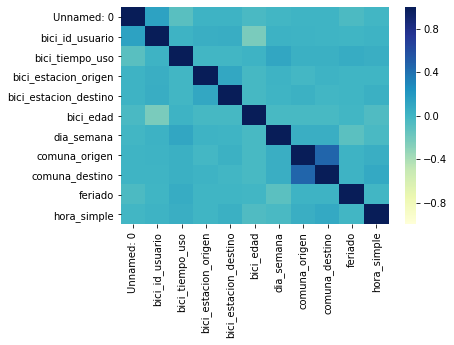

In [6]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap

sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [7]:
#Generando variables dummies
dummies_dia = pd.get_dummies(df.dia, prefix=None, prefix_sep='_', drop_first=True)
dummies_sexo=pd.get_dummies(df.bici_sexo, prefix=None, prefix_sep='_', drop_first=True)
dummies_origen=pd.get_dummies(df.bici_nombre_estacion_origen, prefix=None, prefix_sep='_', drop_first=True)
dummies_comuna=pd.get_dummies(df.comuna_origen, prefix='comuna', prefix_sep='_', drop_first=True)
dummies_estacion_agno=pd.get_dummies(df.estacion_agno, prefix=None, prefix_sep='_', drop_first=True)
dummies_rango=pd.get_dummies(df.rango_horario, prefix=None, prefix_sep='_', drop_first=True)

#La variable 'feriado' ya está expresada como dummie
#Las variables 'bici_edad' y 'hora_simple' se mantienen como contínuas

In [8]:
#Concatenamos los df de las dummies
df=pd.concat([df,dummies_sexo,dummies_dia,dummies_comuna,dummies_rango,dummies_origen,dummies_estacion_agno], axis=1)

In [9]:
df.head()

,Unnamed: 0,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,...,Velasco,Venezuela,Vera Peñaloza,Villarroel,Virrey Cevallos,Virrey Liniers,Yatay,OTOÑO,PRIMAVERA,VERANO
0,0,5453,2018-01-01 00:08:05,19,Uruguay,45,Virrey Cevallos,183,M,45,...,0,0,0,0,0,0,0,0,0,1
1,1,673,2018-01-01 00:18:05,26,Posadas,189,Guardia Vieja,110,M,61,...,0,0,0,0,0,0,0,0,0,1
2,2,179119,2018-01-01 00:20:14,27,Hospital Rivadavia,50,Padilla,31,F,52,...,0,0,0,0,0,0,0,0,0,1
3,3,400147,2018-01-01 00:20:22,48,Macacha Güemes,111,Acuña de Figueroa,54,M,27,...,0,0,0,0,0,0,0,0,0,1
4,4,400156,2018-01-01 00:20:31,49,Macacha Güemes,111,Acuña de Figueroa,54,F,27,...,0,0,0,0,0,0,0,0,0,1


In [10]:
#Dropear las features redundantes o que no necesitamos
df = df.drop(['barrio_destino'], axis=1)
df = df.drop(['barrio_origen'], axis=1)
df = df.drop(['bici_nombre_estacion_destino'], axis=1)
df = df.drop(['bici_nombre_estacion_origen'], axis=1)
df = df.drop(['dia'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
df=df.drop(['bici_id_usuario'], axis=1)
df=df.drop(['bici_Fecha_hora_retiro'], axis=1)
df=df.drop(['bici_estacion_origen'], axis=1)
df=df.drop(['bici_estacion_destino'], axis=1)
df=df.drop(['fecha'], axis=1)
df=df.drop(['dia_semana'], axis=1)
df=df.drop(['bici_sexo'], axis=1)
df=df.drop(['comuna_destino'], axis=1)
df=df.drop(['hora'], axis=1)
df=df.drop(['estacion_agno'], axis=1)
df=df.drop(['rango_horario'], axis=1)
df=df.drop(['bici_tiempo_uso'], axis=1)



df.head()

,bici_edad,comuna_origen,feriado,uso_categorico,hora_simple,M,N,JUEVES,LUNES,MARTES,...,Velasco,Venezuela,Vera Peñaloza,Villarroel,Virrey Cevallos,Virrey Liniers,Yatay,OTOÑO,PRIMAVERA,VERANO
0,45,1,1,BAJO,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,61,2,1,BAJO,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,52,14,1,BAJO,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,27,1,1,MEDIO,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,27,1,1,MEDIO,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# Para Entrenamiento: tomamos un filtro con los índices pares de 25.000 casos para cada clase, por lo que estamos balanceando 
# las clases objetivos para lograr un oversampling.
df_bajo_E = df.loc[(df['uso_categorico']=='BAJO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 5)
df_medio_E = df.loc[(df['uso_categorico']=='MEDIO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 15)
df_alto_E = df.loc[(df['uso_categorico']=='ALTO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 25)
df_excedido_E = df.loc[(df['uso_categorico']=='EXCEDIDO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 35)

In [12]:
#Concatenamos los df generados
df_balance = pd.concat([df_bajo_E, df_medio_E, df_alto_E,  df_excedido_E])

In [13]:
#Tomamos del data set de entranmiento solo la serie de 'uso_categorico' que es nuestra y
y_train=df_balance['uso_categorico']

In [14]:
#El resto del df par lo almacenamos en nuestro DF de entrenamiento
X_train=df_balance.drop(['uso_categorico'], axis=1)

In [15]:
# Del mismo modo pero para nuestro set de testeo y con los índices impares, generamos el df test
df_test = df.loc[(df['uso_categorico'].index % 2 == 1),:].sample(200000, random_state= 5)

In [16]:
# Su respectiva y_test
y_test=df_test['uso_categorico']

In [17]:
# Y el df test
X_test=df_test.drop(['uso_categorico'], axis=1)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [20]:
#instanciamos modelos
model = linear_model.LogisticRegression(multi_class='multinomial')
          

In [29]:
#determinamos lo parametros para ambos modelos
params = {'C': [ 0.001, 0.01, 0.1],
         'penalty': ['l1',],
         'solver': ['saga'],
         }
   

In [26]:

from sklearn.metrics import precision_score, make_scorer
prec_scorer = make_scorer(precision_score, average='micro')

In [30]:
#intanciamos Greedserch para los modelos

gs = GridSearchCV(model, params, scoring='accuracy', cv=10, n_jobs=8)


In [31]:
#Corremos el grid con el modelo 
gs.fit(X_train,y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l1'],
                         'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [32]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [33]:
# Generamos el df con los resultados de los distintos modelos que corrió
pd.DataFrame(gs.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [34]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,61.835472,1.993001,0.053158,0.002926,0.001,l1,saga,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}",0.2930,0.2984,...,0.2912,0.2972,0.2998,0.2964,0.2990,0.2873,0.2924,0.29409,0.004594,3
1,336.453811,20.708189,0.056050,0.011291,0.01,l1,saga,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}",0.3207,0.3148,...,0.3086,0.3192,0.3242,0.3154,0.3227,0.3150,0.3164,0.31716,0.004367,2
2,334.443670,67.290022,0.042437,0.008842,0.1,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.3229,0.3125,...,0.3119,0.3200,0.3269,0.3145,0.3261,0.3170,0.3181,0.31864,0.005017,1


In [35]:
#mejor resultado, el 0.32628 es la acuracy. 
# Con los hiperparámetros {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
gs.best_estimator_, gs.best_score_, gs.best_params_

(LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='multinomial', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 0.31864,
 {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'})

In [20]:
#Corremos de nuevo el mejor modelo y fiteamos
lg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='multinomial', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False)

In [21]:

lg.fit(X_train, y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Generamos las predicciones tomando las features del set de testeo

X_test = scaler.transform(X_test)

y_pred_train= lg.predict(X_train)

y_pred_test= lg.predict(X_test)

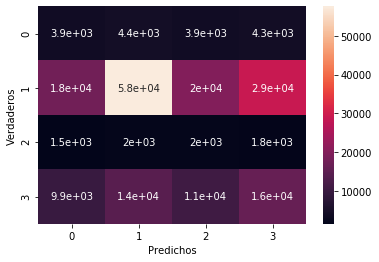

In [23]:
# Elaboramos la matriz de confusión:

confusion_matrix(y_test, y_pred_test)

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test,y_pred_test))

[[ 3948  4434  3946  4333]
 [17943 57622 19975 29177]
 [ 1518  2034  1984  1775]
 [ 9896 14382 10776 16257]]
              precision    recall  f1-score   support

        ALTO       0.12      0.24      0.16     16661
        BAJO       0.73      0.46      0.57    124717
    EXCEDIDO       0.05      0.27      0.09      7311
       MEDIO       0.32      0.32      0.32     51311

    accuracy                           0.40    200000
   macro avg       0.31      0.32      0.28    200000
weighted avg       0.55      0.40      0.45    200000

0.399055


In [26]:
# Calculamos el accuracy

accuracy_score(y_test, y_pred_test)

0.399055